In [68]:
# description       : Basic decision tree for hearth desease prediction
# author            : raulsainz
# email             : 
# date              : 20210323
# version           : 0.1
#==============================================================================

In [69]:
#Import necesary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree  import DecisionTreeClassifier
from sklearn.tree  import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Import Data
### Read CSV data from UCI Machine Learning Repository
<br>reference: https://archive.ics.uci.edu/ml/datasets/heart+disease

### Data Set Information:
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.

In [70]:
#load csv directly from UCI
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Attribute Information:

Only 14 attributes used: 

1. #3 (age) - age in years 
2. #4 (sex) - sex (1 = male; 0 = female) 
3. #9 (cp)  - chest pain type 
4. #10 (trestbps) - resting blood pressure (in mm Hg on admission to the hospital)
5. #12 (chol) -  serum cholestoral in mg/dl 
6. #16 (fbs) - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg)  - resting electrocardiographic results 
8. #32 (thalach) - maximum heart rate achieved 
9. #38 (exang) - exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak) - ST depression induced by exercise relative to rest 
11. #41 (slope) - the slope of the peak exercise ST segment 
12. #44 (ca) - number of major vessels (0-3) colored by flourosopy
13. #51 (thal) - thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (hd)  - diagnosis of heart disease  **the predicted attribute**

In [71]:
#Assign column names
df.columns = ['age','sex','cp','restbp','chol','fbs','restecg','talach','exang','oldpeak','slope','ca','thal','hd']

In [105]:
X.dtypes

age         float64
sex         float64
cp         category
restbp      float64
chol        float64
fbs         float64
restecg    category
talach      float64
exang       float64
oldpeak     float64
slope      category
ca         category
thal       category
dtype: object

In [73]:
#Check data types
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
talach     float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

## Dealing with missing values

In [74]:
#Check for null values on all columns
df.isnull().sum(axis = 0)

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
talach     0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [75]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [76]:
df.ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [77]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [78]:
df.thal.value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [79]:
#Locating rows with odd values
df.loc[(df['ca']=='?')| (df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,talach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [80]:
#df[[('ca'=='?') | ('thal'=='?')]]
df.query('ca=="?" | thal=="?" ')

,age,sex,cp,restbp,chol,fbs,restecg,talach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [81]:
#removing observations
remove = (df['ca']=='?') | (df['thal']=='?')
df = df[-remove]

In [82]:
df.shape

(297, 14)

In [83]:
df.query('ca=="?" | thal=="?" ')

,age,sex,cp,restbp,chol,fbs,restecg,talach,exang,oldpeak,slope,ca,thal,hd


In [84]:
df['hd'].unique()

array([0, 2, 1, 3, 4])

In [85]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
talach     float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [86]:
#Split the data into DV and IV's
X = df.drop('hd',axis=1)
X.shape

(297, 13)

In [87]:
y = df['hd']
y.shape

(297,)

## Format Data - Hot encoding

In [92]:
X.dtypes

age        float64
sex        float64
cp           int64
restbp     float64
chol       float64
fbs        float64
restecg      int64
talach     float64
exang      float64
oldpeak    float64
slope        int64
ca         float64
thal       float64
dtype: object

### Values for thal
1. Typica angina
2. Atypical angina
3. non-angina pain
4. asymptomatic

In [96]:
X..value_counts()

0    174
1     65
2     38
3     20
Name: ca, dtype: int64

In [94]:
#Fix column types first as int to get rid of the decimal point (for dummy creation variables)
X['thal'] = X['thal'].astype(float)
X['ca'] = X['ca'].astype(float)
X['cp'] = X['cp'].astype(int)
X['restecg'] = X['restecg'].astype(int)
X['slope'] = X['slope'].astype(int)
X['thal'] = X['thal'].astype(int)
X['ca'] = X['ca'].astype(int)

In [106]:
X['thal'] = X['thal'].astype('category')
X['ca'] = X['ca'].astype('category')
X['cp'] = X['cp'].astype('category')
X['restecg'] = X['restecg'].astype('category')
X['slope'] = X['slope'].astype('category')
X['fbs'] = X['fbs'].astype('category')
X['exang'] = X['exang'].astype('category')
X['sex'] = X['sex'].astype('category')

In [107]:
X.dtypes

age         float64
sex        category
cp         category
restbp      float64
chol        float64
fbs        category
restecg    category
talach      float64
exang      category
oldpeak     float64
slope      category
ca         category
thal       category
dtype: object

### Transfor CP into hot-encoding


In [108]:
# Test the result of get dummies
pd.get_dummies(X,columns=['cp','restecg','slope','thal'])

,age,sex,restbp,chol,fbs,talach,exang,oldpeak,ca,cp_1,...,cp_4,restecg_0,restecg_1,restecg_2,slope_1,slope_2,slope_3,thal_3,thal_6,thal_7
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0,0,...,1,1,0,0,0,1,0,0,0,1
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0,1,...,0,1,0,0,0,1,0,0,0,1
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2,0,...,1,1,0,0,0,1,0,0,0,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1,0,...,1,1,0,0,0,1,0,0,0,1


In [109]:
X_dummy = pd.get_dummies(X,columns=['cp','restecg','slope','thal'])
X_dummy.shape

(297, 22)

In [111]:
#dependant variable has multiple values
y.unique()

array([0, 2, 1, 3, 4])

### Valies HD  for (y)
0. No heart disease
1. Some kind of heart disease
2. Some kind of heart disease
3. Some kind of heart disease
4. Some kind of heart disease

In [112]:
query = y>0 #create index
y[query] = 1 #Assign 1 to all y values > 0 as they have some kind of heart disease
y.unique()

array([0, 1])

In [114]:
#check DV and IV's shape
print(X_dummy.shape)
print(y.shape)

(297, 22)
(297,)


# Model Buildng

In [116]:
#spliting the dataset
X_train,X_test, y_train,y_test = train_test_split(X_dummy,y,random_state=42)

In [117]:
#First decision tree
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train,y_train)

[Text(479.8318965517241, 390.7125, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = no HD'),
 Text(277.79741379310343, 356.73749999999995, 'thal_7 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = no HD'),
 Text(169.5646551724138, 322.7625, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = no HD'),
 Text(122.66379310344828, 288.78749999999997, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = no HD'),
 Text(72.15517241379311, 254.81249999999997, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = no HD'),
 Text(43.293103448275865, 220.83749999999998, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = no HD'),
 Text(28.862068965517242, 186.86249999999998, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = no HD'),
 Text(14.431034482758621, 152.8875, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = no HD'),
 Text(43.293103448275865, 152.8875, 'exang <= 0.5\ngini = 0.5\

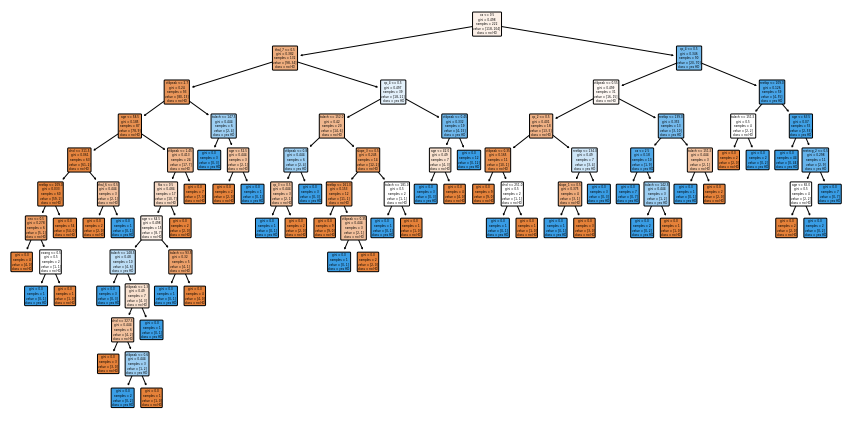

In [118]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,filled=True,rounded=True,class_names=['no HD','yes HD'],feature_names=X_dummy.columns)

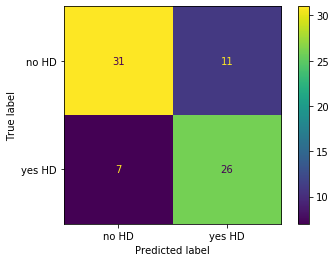

In [119]:
plot_confusion_matrix(clf_dt,X_test,y_test, display_labels=['no HD','yes HD'])

Total of people without HD is 42 (31+11) 31 (74%) correclty predicted
<br>Total people with HD is 33 (7+26) only 26 (79%) correclty predicted

## Pruning the tree to fix over fiting
Pruning is one of the techniques that is used to overcome our problem of Overfitting. Pruning, in its literal sense, is a practice which involves the selective removal of certain parts of a tree.

In [144]:
path = clf_dt.cost_complexity_pruning_path(X_train,y_train)

In [145]:
cpp_alphas = path.ccp_alphas #extract different values for alpha
cpp_alphas = cpp_alphas[:-1] #exclude the maximum value for alpha

decision_trees =[] #create array to save each tree info


In [146]:
# Iterare alphas and create  decision tree for each value of alpha
for alpha in cpp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=alpha)
    clf_dt = clf_dt.fit(X_train,y_train)
    decision_trees.append(clf_dt)
    

In [123]:
train_scores = [clf_dt.score(X_train,y_train) for clf_dt in decision_trees]
test_scores = [clf_dt.score(X_test,y_test) for clf_dt in decision_trees]

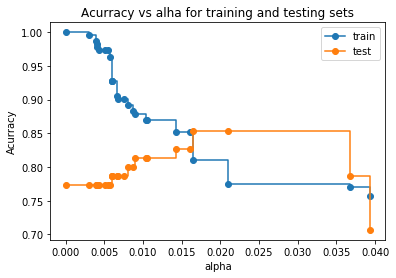

In [125]:
#Plot results of accuracy vs alpha
fig,ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('Acurracy')
ax.set_title('Acurracy vs alha for training and testing sets')
ax.plot(cpp_alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
ax.plot(cpp_alphas,test_scores,marker='o',label='test',drawstyle='steps-post')
ax.legend()
plt.show()

## Cross validation for findng best alpha

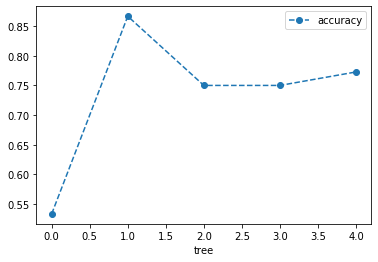

In [127]:
clf_dt = DecisionTreeClassifier(random_state=42,ccp_alpha=0.016) #ccp alpha taken from previous step
folds = 5 #5 fold validation because sample is small
scores = cross_val_score(clf_dt,X_train,y_train,cv=folds) 
df = pd.DataFrame(data={'tree':range(folds),'accuracy':scores})
df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

Tha graph shows that the accuracy varies among different dataset samples,  meaning that the alpha is sensitive to the dataset

In [133]:
alpha_values = [] #create array to store different alpha values
folds = 5 #5 define number folds, select 5 because sample is small
for alpha in cpp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=alpha) #create tree with selected aplha    
    scores = cross_val_score(clf_dt,X_train,y_train,cv=folds) #Evaluate a score by cross-validation
    alpha_values.append([alpha,np.mean(scores),np.std(scores)]) #Add score values of alpha to array
alpha_results = pd.DataFrame(alpha_values,columns=['alpha','mean_accuracy','std']) #store result on dataframe for ploting


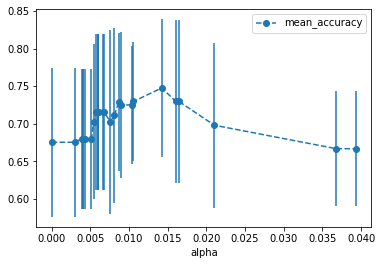

In [134]:
# Plot results
alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

we can observe the optimal alpha value after cross validation is more close to 0.014

In [135]:
#search for the alpha in the dataset
alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [139]:
#save the best alpha
best_alpha= alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]['alpha']
best_alpha = float(ideal_alpha) # get foat value to be used as input in final tree

In [140]:
best_alpha

0.014224751066856332

# Create final tree with best Alpha

In [141]:
#create and fit new treee using 
clf_dt_pruned = DecisionTreeClassifier(random_state=42,ccp_alpha=best_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train,y_train)

* First tree predicted: 31/42 (74%) for no HD and 26/33 (79%) for HD
* Final tree predicted: 34/42 (80%) for no HD and 28/33 (84%) for HD

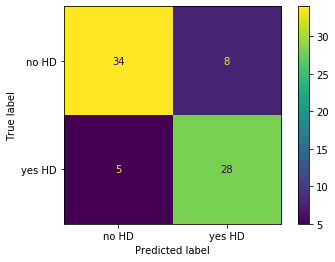

In [142]:
#Print confusuin matrix
plot_confusion_matrix(clf_dt_pruned,X_test,y_test, display_labels=['no HD','yes HD'])

[Text(482.8846153846154, 356.7375, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = no HD'),
 Text(257.53846153846155, 254.8125, 'thal_7 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = no HD'),
 Text(128.76923076923077, 152.8875, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = no HD'),
 Text(64.38461538461539, 50.96249999999998, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = no HD'),
 Text(193.15384615384616, 50.96249999999998, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = yes HD'),
 Text(386.3076923076923, 152.8875, 'cp_4 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = yes HD'),
 Text(321.9230769230769, 50.96249999999998, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = no HD'),
 Text(450.69230769230774, 50.96249999999998, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = yes HD'),
 Text(708.2307692307693, 254.8125, 'cp_4 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = yes HD'),
 

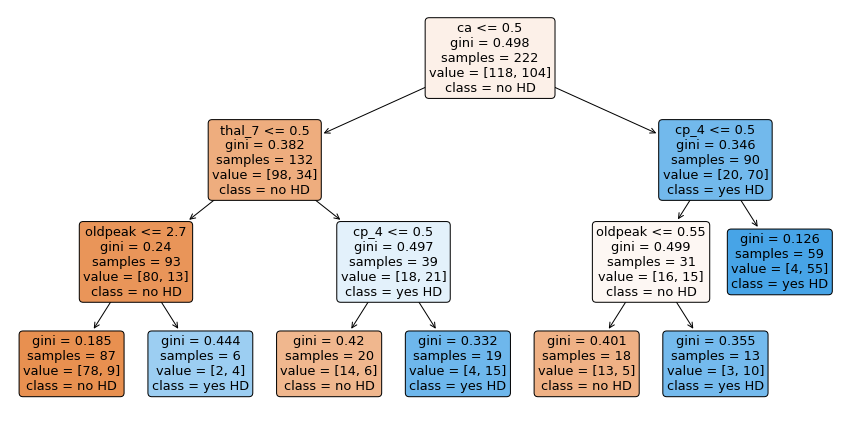

In [143]:
#Display final tree
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=['no HD','yes HD'],feature_names=X_dummy.columns)